## Data preparation


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()

df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

display(df.head())

display(df.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

In [4]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Train-test split


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Model building (logistic regression)




In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


## Cross-validation (5-fold)



In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean 5-Fold Cross-Validation Accuracy: {mean_cv_score:.4f}")
print(f"Standard Deviation of 5-Fold Cross-Validation Accuracy: {std_cv_score:.4f}")

Mean 5-Fold Cross-Validation Accuracy: 0.9758
Standard Deviation of 5-Fold Cross-Validation Accuracy: 0.0146


## Model evaluation (confusion matrix)



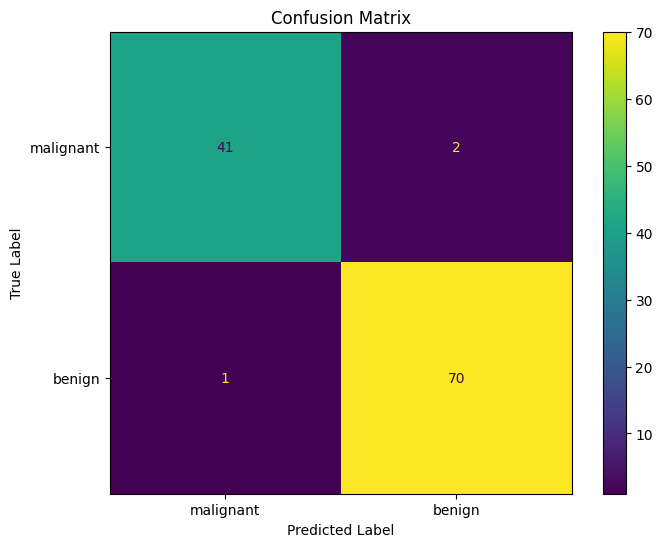


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

## Learning curve visualization




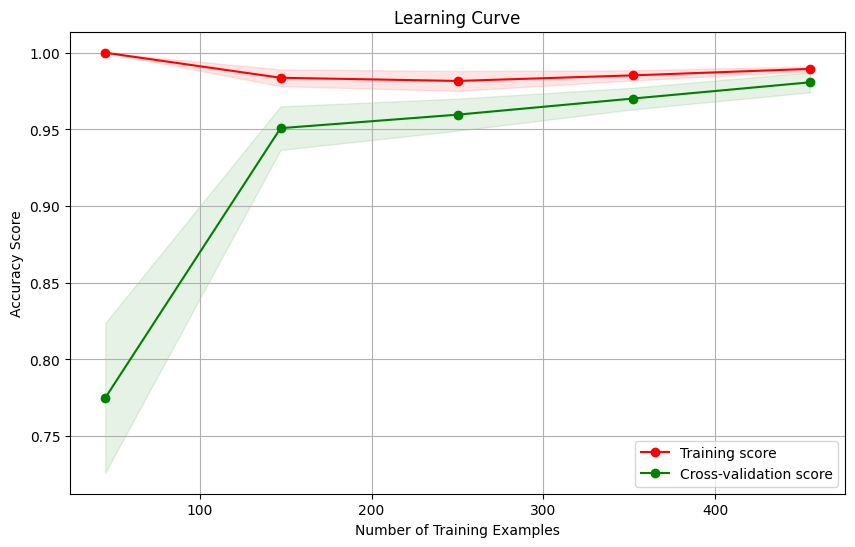

In [9]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled_df, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Interpretation & discussion




**The results of the confusion matrix** indicates that the logistic regression model performs well on the test set. Out of the 43 malignant cases, it correctly defined 41 true positives and 2 false negatives while out of 71 benign cases, 70 were true negatives and 1 false positive. This indicates high accuracy and precision on the model.

**The 5 fold cross validation** shows a mean accuracy of 0.9758 with a standae deviation of 0.0146, A low standard deviation relative to the mean indicates the model's performance is consistent across different subsets of tha training data, suggesting that the model is not overly sensitive to the specific training data split.

**The learning curve** shows trhat both the training and cross validation scores converge as the number of training example increases. The small gap between the two curves and their convergence at a high accuracy level suggests that the model is not suffering from significant overfitting or underfitting. Adding more training data beyond the current amount is unlikely to significantly improve the model's performance.

**The model can be improved** by exploring other models, hyperparameter tuning, combining the predictions of multiple models to enhance robustness and accuracy, and exploring new features or transforming existing ones could potentially provide more information to the model


## Challenge




In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=breast_cancer.target_names))

Decision Tree Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:

print("Comparison of Model Performance:")
print("-" * 40)
print("Logistic Regression Test Accuracy:", test_accuracy)
print("Decision Tree Test Accuracy:", classification_report(y_test, y_pred_dt, output_dict=True)['accuracy'])
print("-" * 40)

if test_accuracy > classification_report(y_test, y_pred_dt, output_dict=True)['accuracy']:
    print("Logistic Regression performed better than Decision Tree on the test set.")
elif test_accuracy < classification_report(y_test, y_pred_dt, output_dict=True)['accuracy']:
    print("Decision Tree performed better than Logistic Regression on the test set.")
else:
    print("Logistic Regression and Decision Tree performed equally well on the test set.")

Comparison of Model Performance:
----------------------------------------
Logistic Regression Test Accuracy: 0.9736842105263158
Decision Tree Test Accuracy: 0.9473684210526315
----------------------------------------
Logistic Regression performed better than Decision Tree on the test set.
